#### Fall 2021, Discussion 11B

## Linearization Supplement: Visualizing $x, y$ Partial Derivatives in 3D

Use the cells below (no code needs to be added or changed) to visualize partial derivatives better for a multivariable function! Note that if running on datahub, the sliders may take a bit (maybe a couple seconds) to update, and so running this locally may be better to see the dynamic effects more smoothly. You can also drag the plots around in 3D space to view things from different angles. Enjoy!

Contributors:
- Neelesh Ramachandran [Fa21] 

In [12]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D   # Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider

%matplotlib notebook

In [13]:
import IPython
from ipywidgets import interactive, widgets
from IPython.display import display, HTML

<IPython.core.display.Javascript object>


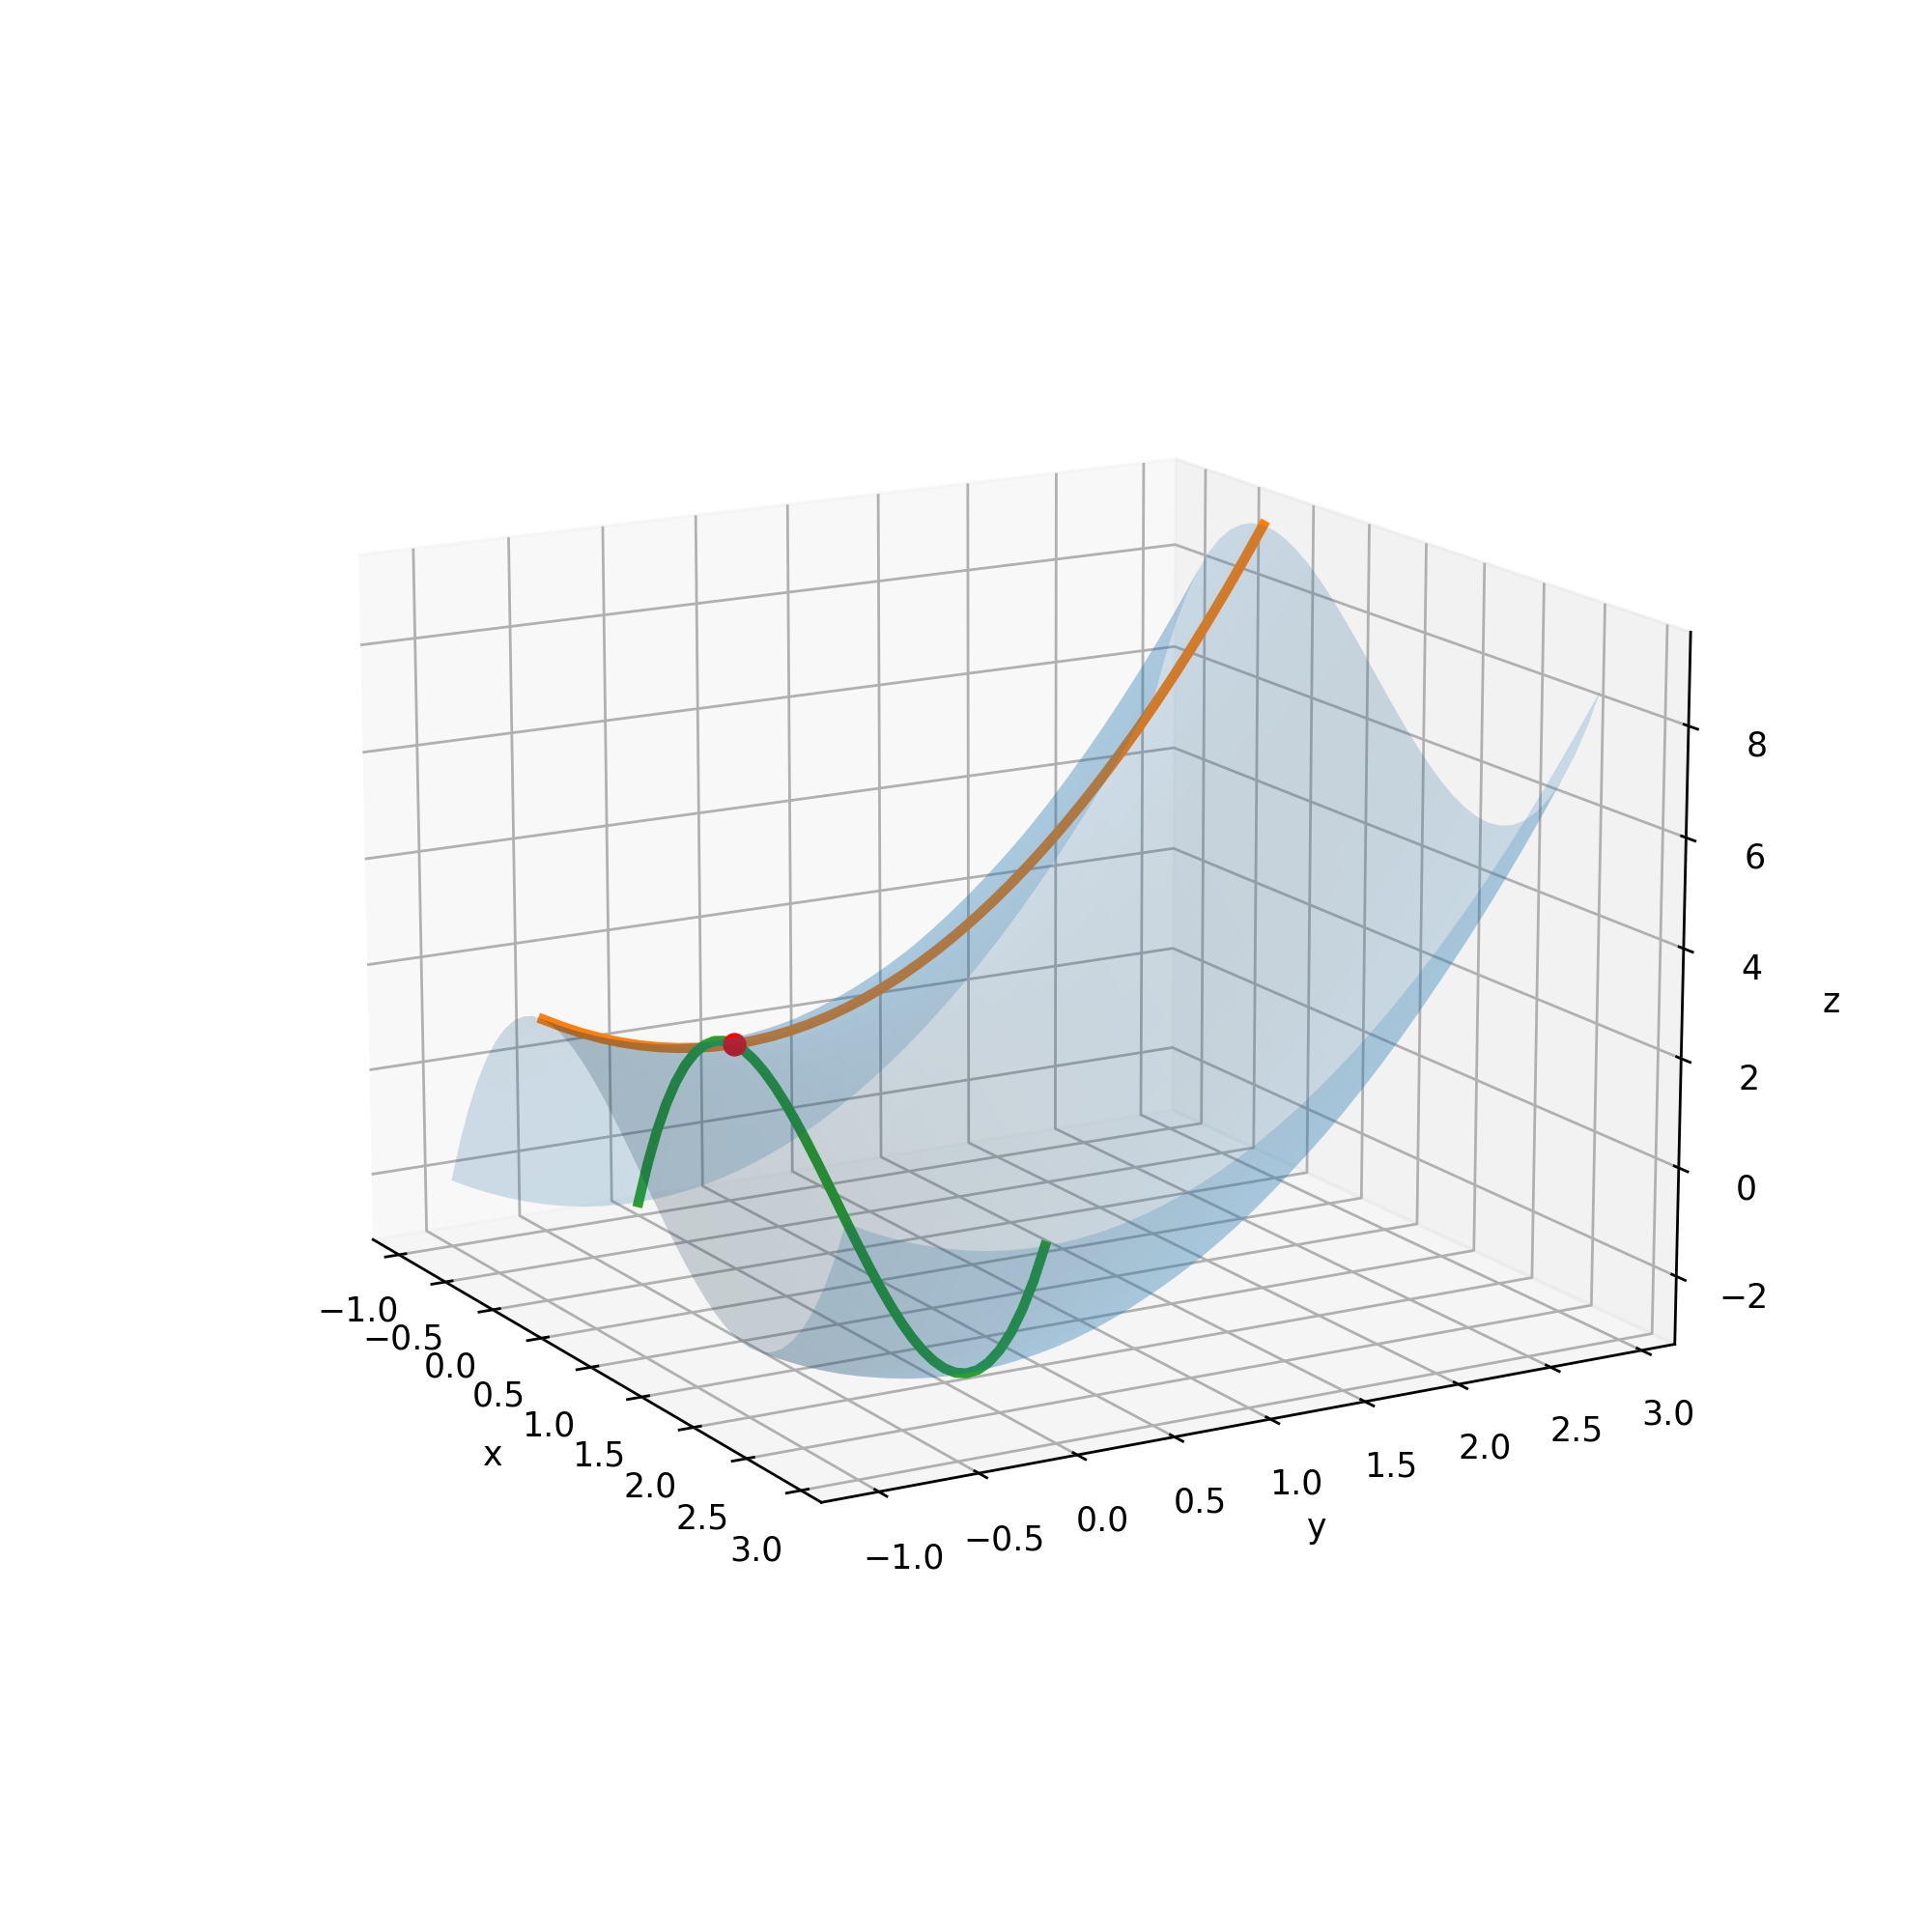

interactive(children=(FloatSlider(value=0.0, description='$x$', max=3.0, min=-1.0), FloatSlider(value=0.0, des…

In [14]:
def surface(x, y):
    return x**3 - 3*x**2 + 1 + y**2

plot_planes = True

xmin  = -1.0
xmax = 3.0
ymin = -1.0
ymax = 3.0

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(bottom=0, top=1)

ax = fig.add_subplot(111, projection='3d')
x = np.arange(xmin, xmax, 0.1)
y = np.arange(ymin, ymax, 0.1)
X, Y = np.meshgrid(x, y)
zs = np.array(surface(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.view_init(15, -30)
ax.plot_surface(X, Y, Z, alpha=0.2)

x_spec = 0
y_spec = 1

xline_plot, = ax.plot([], [], [], linewidth=3)
yline_plot, = ax.plot([], [], [], linewidth=3)

dot_plot, = ax.plot(x_spec, y_spec, surface(x_spec, y_spec), 'ro')

if plot_planes:
    y_yplane, z_yplane = np.meshgrid(y, np.arange(-10, 10, 0.1))
    x_xplane, z_xplane = np.meshgrid(x, np.arange(-10, 10, 0.1))
    
xplane_plot, = ax.plot([], [], [], linewidth=3, alpha=0.15)
yplane_plot, = ax.plot([], [], [], linewidth=3, alpha=0.15)
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

def update(slide_x = 0, slide_y = 1, x_plane = False, y_plane = False):
    x_spec = slide_x
    y_spec = slide_y
    plot_x_plane = x_plane
    plot_y_plane = y_plane
    
    xline_plot.set_data_3d(np.full(len(Y), x_spec), y, surface(x_spec, y))
    yline_plot.set_data_3d(x, np.full(len(Y), y_spec), surface(x, y_spec))
    
    if plot_x_plane: 
        xplane_plot.set_data_3d(x_xplane, y_spec, z_xplane)
    else: 
        xplane_plot.set_data_3d([], [], [])
        
    if plot_y_plane: 
        yplane_plot.set_data_3d(x_spec, y_yplane, z_yplane)
    else: 
        yplane_plot.set_data_3d([], [], [])
        
    dot_plot.set_data_3d(x_spec, y_spec, surface(x_spec, y_spec))
    fig.canvas.draw_idle()
    
slide_plt = interactive(update,
                               slide_x=widgets.FloatSlider(value=0, min=xmin, max=xmax, step=0.1, description="$x$"), 
                               slide_y=widgets.FloatSlider(value=0, min=ymin, max=ymax, step=0.1, description="$y$"),
                               y_plane=widgets.Checkbox(value=False, description='Plot constant x Plane', disabled=False, button_style='success'),
                               x_plane=widgets.Checkbox(value=False, description='Plot constant y Plane', disabled=False, button_style='success'))

output = slide_plt.children[-1]
slide_plt